Exploration et Nettoyage du Dataset de Livres et
préparation des données pour la classification

In [1]:
# Installer les packages nécessaires
!pip install kagglehub pandas matplotlib seaborn numpy

  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)
  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.3.5-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached kagglehub-0.3.13-py3-none-any.whl (68 kB)
Using cached pandas-2.3.3-cp313-cp313-win


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [8]:
# Telecharger le dataset
chemin_dataset = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
print(f"Dataset téléchargé: {chemin_dataset}")

Dataset téléchargé: C:\Users\barry\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [9]:
# Chargement des données
df_livres = pd.read_csv(f"{chemin_dataset}/books.csv")
print("Dimensions du dataset:", df_livres.shape)
print("\nAperçu des données:")
print(df_livres.head())

Dimensions du dataset: (6810, 12)

Aperçu des données:
          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.goo

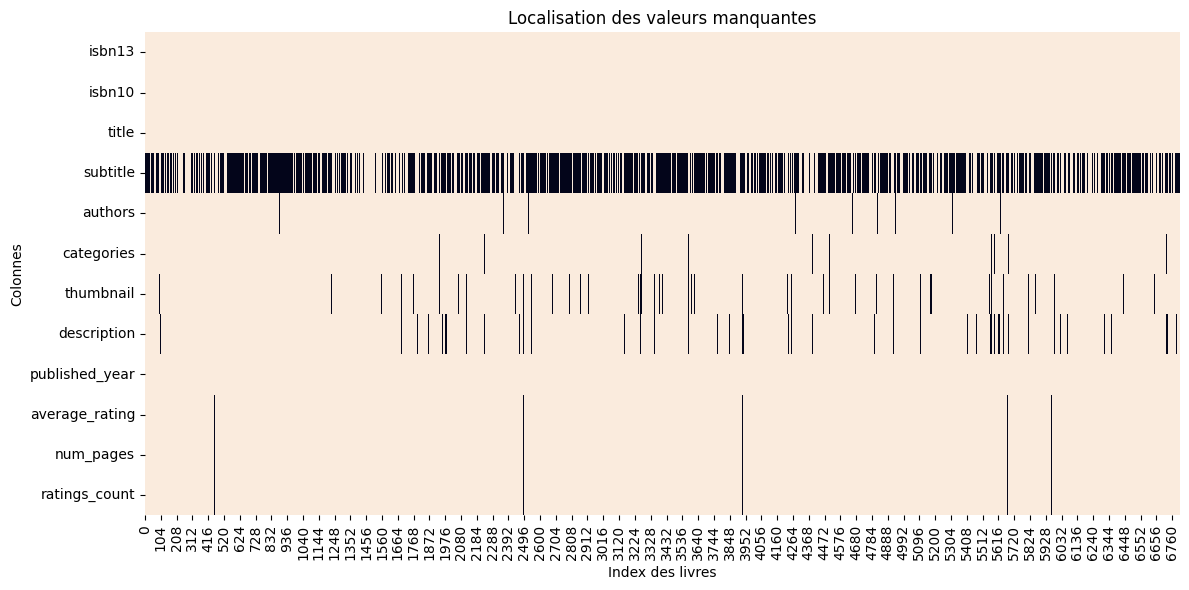

In [10]:
# Créer une visualisation des valeurs manquantes
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(
    df_livres.isna().transpose(),
    cbar=False,
    ax=ax,
    cmap='rocket_r'
)
plt.xlabel("Index des livres")
plt.ylabel("Colonnes")
plt.title("Carte des valeurs manquantes")
plt.tight_layout()
plt.show()

In [11]:
# Résumé
print("\nNombre de valeurs manquantes par colonne:")
manquantes_par_colonne = df_livres.isnull().sum()
for col in df_livres.columns:
    manquantes = manquantes_par_colonne[col]
    pourcentage = (manquantes / len(df_livres)) * 100
    if manquantes > 0:
        print(f"  {col:25}: {manquantes:6} valeurs ({pourcentage:5.1f}%)")



Nombre de valeurs manquantes par colonne :
  subtitle                  :   4429 valeurs ( 65.0%)
  authors                   :     72 valeurs (  1.1%)
  categories                :     99 valeurs (  1.5%)
  thumbnail                 :    329 valeurs (  4.8%)
  description               :    262 valeurs (  3.8%)
  published_year            :      6 valeurs (  0.1%)
  average_rating            :     43 valeurs (  0.6%)
  num_pages                 :     43 valeurs (  0.6%)
  ratings_count             :     43 valeurs (  0.6%)


In [12]:
# Variables derivees
# Calculer si la description est manquante (0 ou 1)
df_livres["desc_absente"] = df_livres["description"].isnull().astype(int)

# Calculer l'âge du livre (année actuelle - année publication)
annee_courante = 2024
df_livres["annees_depuis_publication"] = annee_courante - df_livres["published_year"]

print("\nVariables dérivées créées:")
print(f"  - desc_absente: {df_livres['desc_absente'].sum()} livres sans description")
print(f"  - annees_depuis_publication: min={df_livres['annees_depuis_publication'].min()}, max={df_livres['annees_depuis_publication'].max()}")


Variables dérivées créées :
  - desc_absente : 262 livres sans description
  - annees_depuis_publication : min=5.0, max=171.0



Création de la matrice de corrélation...


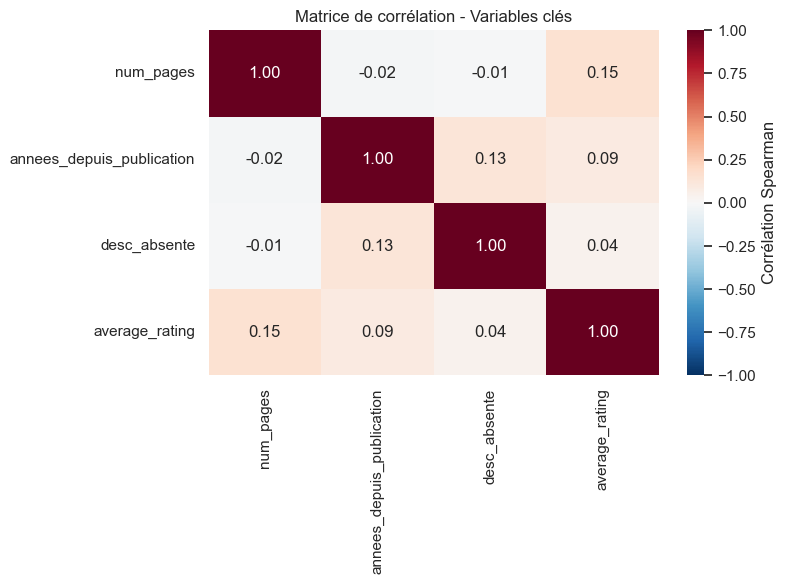

In [13]:
# Sélectionner les colonnes d'intérêt pour l'analyse de corrélation
colonnes_analyse = ["num_pages", "annees_depuis_publication", "desc_absente", "average_rating"]

# Vérifier que toutes les colonnes existent et ont des valeurs numériques
print("\nCréation de la matrice de corrélation...")

# Calculer la corrélation avec la méthode de Spearman
matrice_corr = df_livres[colonnes_analyse].corr(method="spearman")

# Visualiser la corrélation
plt.figure(figsize=(8, 6))
sns.set_theme(style="white")
hm = sns.heatmap(
    matrice_corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    vmin=-1, vmax=1,
    cbar_kws={"label": "Corrélation Spearman"}
)
hm.set_title("Matrice de corrélation - Variables clés")
plt.tight_layout()
plt.show()



In [14]:
print("\nRésultats de la corrélation:")
print(matrice_corr)


Résultats de la corrélation :
                           num_pages  annees_depuis_publication  desc_absente  \
num_pages                   1.000000                  -0.016623     -0.012317   
annees_depuis_publication  -0.016623                   1.000000      0.130712   
desc_absente               -0.012317                   0.130712      1.000000   
average_rating              0.154642                   0.091645      0.041533   

                           average_rating  
num_pages                        0.154642  
annees_depuis_publication        0.091645  
desc_absente                     0.041533  
average_rating                   1.000000  


In [16]:
# Filtrer les livres qui ont toutes les informations essentielles
df_clean = df_livres[
    (df_livres["description"].notna()) &
    (df_livres["num_pages"].notna()) &
    (df_livres["average_rating"].notna()) &
    (df_livres["published_year"].notna())
].copy()

print(f"Avant nettoyage: {len(df_livres)} livres")
print(f"Après nettoyage: {len(df_clean)} livres")
print(f"Livres supprimés ou exclues: {len(df_livres) - len(df_clean)} ({((len(df_livres) - len(df_clean))/len(df_livres)*100):.1f}%)")


Avant nettoyage: 6810 livres
Après nettoyage: 6507 livres
Livres supprimés ou exclues: 303 (4.4%)


In [19]:
# Explorer les categories
# Compter les livres par catégorie
dist_categories = df_clean["categories"].value_counts().reset_index()
dist_categories.columns = ["categorie", "nombre"]

print(f"Nombre total de catégories uniques: {len(dist_categories)}")
print(f"\nTop 15 des catégories:")
print(dist_categories.head(15).to_string(index=False))

# Identifier les catégories rares
categories_rares = dist_categories[dist_categories["nombre"] < 50]
print(f"\nCatégories avec moins de 50 livres: {len(categories_rares)}")

Nombre total de catégories uniques : 531

Top 15 des catégories :
                categorie  nombre
                  Fiction    2523
         Juvenile Fiction     534
Biography & Autobiography     391
                  History     258
       Literary Criticism     164
               Philosophy     154
  Comics & Graphic Novels     152
                 Religion     136
                    Drama     126
      Juvenile Nonfiction     114
                   Poetry      75
     Literary Collections      70
                  Science      69
     Business & Economics      66
           Social Science      58

Catégories avec moins de 50 livres : 516


In [23]:
# Longueur des descriptions
# Calculer le nombre de mots par description
df_clean["nb_mots"] = df_clean["description"].str.split().str.len()

print("Statistiques sur le nombre de mots par description:")
stats_mots = df_clean["nb_mots"].describe()
print(stats_mots)


Statistiques sur le nombre de mots par description :
count    6507.000000
mean       66.325803
std        66.120291
min         1.000000
25%        27.000000
50%        40.000000
75%        82.000000
max       920.000000
Name: nb_mots, dtype: float64


In [24]:
# Distribution par tranches
print("\nDistribution par tranches de longueur:")
tranches = [
    (1, 4, "Très court (1-4)"),
    (5, 14, "Court (5-14)"),
    (15, 24, "Moyen (15-24)"),
    (25, 49, "Long (25-49)"),
    (50, float('inf'), "Très long (50+)")
]

for min_mots, max_mots, label in tranches:
    count = len(df_clean[df_clean["nb_mots"].between(min_mots, max_mots)])
    pct = (count / len(df_clean)) * 100
    print(f"  {label:20}: {count:6} livres ({pct:5.1f}%)")


Distribution par tranches de longueur :
  Très court (1-4)     :     55 livres (  0.8%)
  Court (5-14)         :    308 livres (  4.7%)
  Moyen (15-24)        :    947 livres ( 14.6%)
  Long (25-49)         :   2750 livres ( 42.3%)
  Très long (50+)      :   2447 livres ( 37.6%)


In [25]:
# Descriptions très courtes
print("\nDescriptions très courtes (1-4 mots) - Exemples:")
descs_courtes = df_clean[df_clean["nb_mots"].between(1, 4)]["description"]
for i, desc in enumerate(descs_courtes.head(3), 1):
    print(f"  {i}. {desc}")
print(f"  ... ({len(descs_courtes)} total)")


Descriptions très courtes (1-4 mots) - Exemples :
  1. Donation.
  2. Fantasy-roman.
  3. Includes bibliographical references.
  ... (55 total)


In [26]:
# Descriptions courtes
print("\nDescriptions courtes (5-14 mots) - Exemples:")
descs_moyen = df_clean[df_clean["nb_mots"].between(5, 14)]["description"]
for i, desc in enumerate(descs_moyen.head(3), 1):
    print(f"  {i}. {desc}")
print(f"  ... ({len(descs_moyen)} total)")


Descriptions courtes (5-14 mots) - Exemples :
  1. Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.
  2. Koko is Peter Straub's foray into the psychological horror of the Vietnam War.
  3. A matter of life and death - and the Throne of England
  ... (308 total)


In [27]:
# Descriptions moyennes
print("\nDescriptions moyennes (15-24 mots) - Exemples:")
descs_moyen_plus = df_clean[df_clean["nb_mots"].between(15, 24)]["description"]
for i, desc in enumerate(descs_moyen_plus.head(2), 1):
    print(f"  {i}. {desc}")
print(f"  ... ({len(descs_moyen_plus)} total)")


Descriptions moyennes (15-24 mots) - Exemples :
  1. One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.
  2. Tells the story of three generations of Chinese women, beginning at the turn of the century.
  ... (947 total)


In [29]:
# Descriptions longues
print("\nDescriptions longues (25-49 mots) - Exemples:")
descs_longues = df_clean[df_clean["nb_mots"].between(25, 49)]["description"]
for i, desc in enumerate(descs_longues.head(2), 1):
    print(f"  {i}. {desc}...")
print(f"  ... ({len(descs_longues)} total)")


Descriptions longues (25-49 mots) - Exemples :
  1. Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to humanity. Charity, however, the Gift-love of God, is divine, and without this supernatural love, the natural loves become distorted and even dangerous....
  2. Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth birthday celebrations there are ghosts of absent friends and absent enemies....
  ... (2750 total)


In [30]:
# Descriptions tres longues
print("\nDescriptions tres longues (50+ mots) - Exemples:")
descs_tres_longues = df_clean[df_clean["nb_mots"] >= 50]["description"]
for i, desc in enumerate(descs_tres_longues.head(2), 1):
    print(f"  {i}. {desc[:80]}...")
print(f"  ... ({len(descs_tres_longues)} total)")


Descriptions tres longues (50+ mots) - Exemples :
  1. A NOVEL THAT READERS and critics have been eagerly anticipating for over a decad...
  2. A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed...
  ... (2447 total)


In [31]:
# Garder seulement les livres avec descriptions d'au moins 25 mots
seuil_mots = 25
df_descriptions_longues = df_clean[df_clean["nb_mots"] >= seuil_mots].copy()

print(f"Livres avec au moins {seuil_mots} mots: {len(df_descriptions_longues)}")
print(f"Pourcentage conservé: {(len(df_descriptions_longues)/len(df_clean)*100):.1f}%")


Livres avec au moins 25 mots : 5197
Pourcentage conservé : 79.9%


In [32]:
# Combiner le titre et le sous-titre (s'il existe)
df_descriptions_longues["titre_complet"] = np.where(
    df_descriptions_longues["subtitle"].isna(),
    df_descriptions_longues["title"],
    df_descriptions_longues["title"] + ": " + df_descriptions_longues["subtitle"].astype(str)
)

print("Exemples de titres complets:")
for i, titre in enumerate(df_descriptions_longues["titre_complet"].head(3), 1):
    print(f"  {i}. {titre}")

Exemples de titres complets :
  1. Gilead
  2. Spider's Web: A Novel
  3. Rage of angels


In [33]:
# Créer une description étiquetée avec l'ISBN
df_descriptions_longues["description_avec_id"] = (
    df_descriptions_longues["isbn13"].astype(str) + " " +
    df_descriptions_longues["description"].astype(str)
)

print("Exemple de description étiquetée:")
ex = df_descriptions_longues["description_avec_id"].iloc[0]
print(f"  {ex[:100]}...")

Exemple de description étiquetée :
  9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gil...


In [35]:
# Colonnes à conserver pour le fichier final
colonnes_finales = [col for col in df_descriptions_longues.columns
                    if col not in ["subtitle", "desc_absente", "annees_depuis_publication", "nb_mots"]]

print(f"Colonnes à sauvegarder:")
for col in colonnes_finales:
    print(f"  - {col}")

Colonnes à sauvegarder:
  - isbn13
  - isbn10
  - title
  - authors
  - categories
  - thumbnail
  - description
  - published_year
  - average_rating
  - num_pages
  - ratings_count
  - titre_complet
  - description_avec_id


In [37]:
# Sauvegarder le dataset nettoyé
df_descriptions_longues[colonnes_finales].to_csv("livres_nettoyes.csv", index=False)

print(f"Après suppression des valeurs manquantes: {len(df_clean)} livres")
print(f"Après sélection (descriptions >= 25 mots): {len(df_descriptions_longues)} livres")
print(f"Réduction totale: {(1 - len(df_descriptions_longues)/len(df_livres))*100:.1f}%")
print(f"\nFichier sauvegardé: livres_nettoyes.csv")

Après suppression des valeurs manquantes: 6507 livres
Après sélection (descriptions >= 25 mots): 5197 livres
Réduction totale: 23.7%

Fichier sauvegardé: livres_nettoyes.csv
